In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf


In [2]:
data_dic = {
    "Step": [
        1, 2, 3, 4, 1, 2, 3, 4,
        1, 2, 3, 4, 1, 2, 3, 4,
        1, 2, 3, 4, 1, 2, 3, 4,
        1, 2, 3, 4, 1, 2, 3, 4,
        1, 2, 3, 4, 1, 2, 3, 4
    ],
    "X": [
        12.05, 12.2, 11.86, 11.81, 12.24, 12.17, 12.05, 11.79,
        11.92, 12.19, 12.12, 11.84, 11.96, 12.05, 11.95, 11.67,
        11.93, 11.88, 11.87, 11.63, 11.79, 12, 11.95, 11.76, 12.03, 12.07, 11.87, 11.59, 11.91, 11.97, 12.09,
        11.68, 12.14, 12.07, 12.16,12.2, 11.98,
        11.86, 11.98, 11.75
    ]
}

# Create the DataFrame
data = pd.DataFrame(data_dic)

data

,Step,X
0,1,12.05
1,2,12.20
2,3,11.86
3,4,11.81
4,1,12.24
5,2,12.17
6,3,12.05
7,4,11.79
8,1,11.92
9,2,12.19


In [3]:
data['impellers']= np.repeat(np.arange(1, (len(data)/4)+1), 4) 

Number of points n = 40
Mean = 11.95


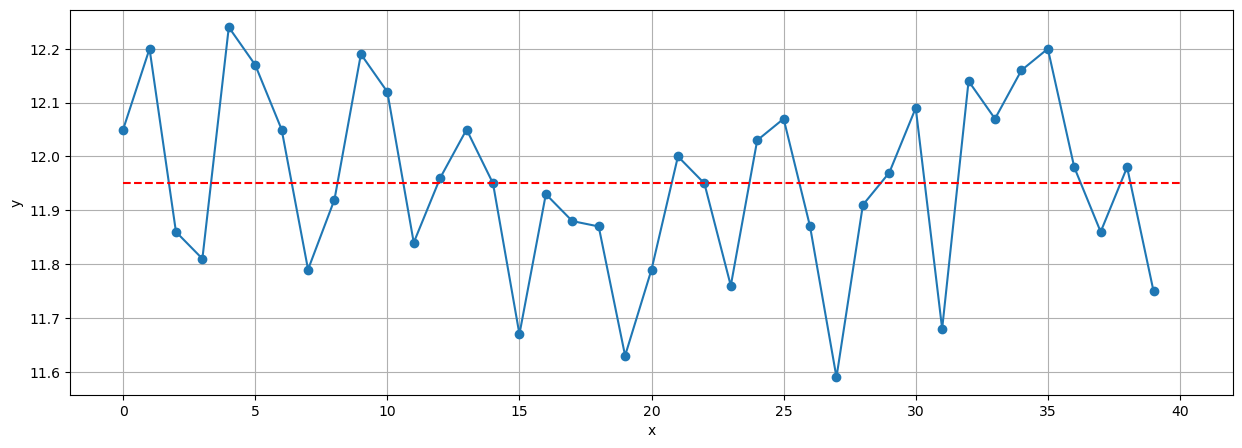

In [4]:
mf.single_ts_plot(data['X'])

Runs test statistic = -0.961
Runs test p-value = 0.337
Accept H0: the data are random
p-value of the Shapiro-Wilk test: 0.601


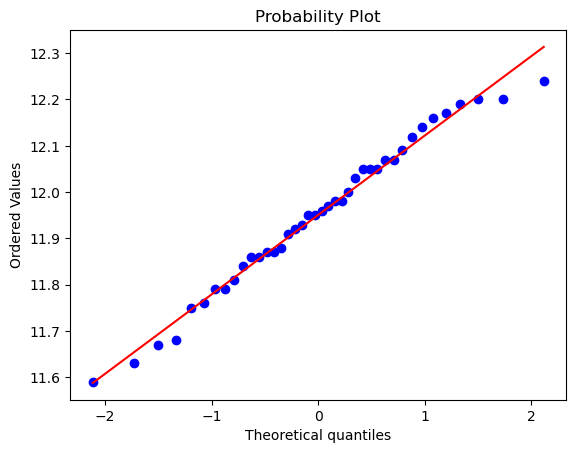

Accept H0: the data are normal


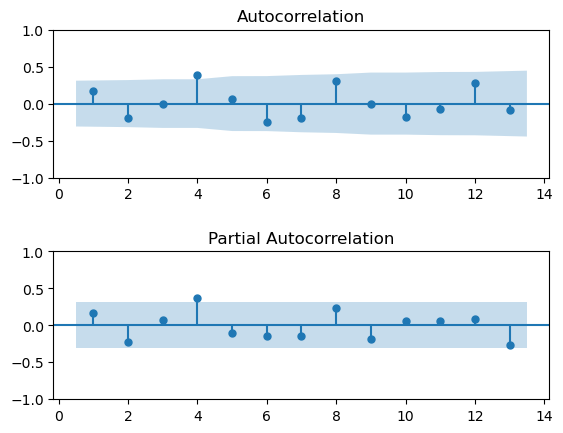

In [5]:
mf.runs(data['X'])
mf.shapiroqq(data['X'])
mf.acfpacf(data['X'])

In [6]:
mf.bartlett_test(data['X'],4)

Test statistic rk = 0.391712
Rejection region starts at 0.309898
The null hypothesis is rejected


c'è una chiara correlazione al lag4 infatti ogni osservazioni abbiamo un certo tipo di sample!

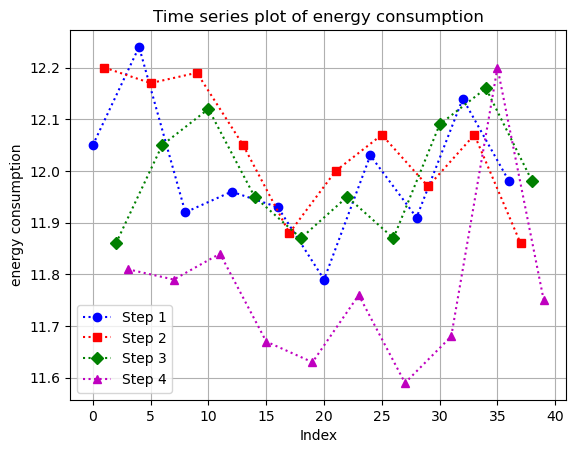

In [7]:
plt.plot(data['X'][data['Step'] == 1], 'o:b', label = 'Step 1') #'o:b' cerchi blu
plt.plot(data['X'][data['Step'] == 2], 's:r', label = 'Step 2')
plt.plot(data['X'][data['Step'] == 3], 'D:g', label = 'Step 3')
plt.plot(data['X'][data['Step'] == 4], '^:m', label = 'Step 4')

plt.xlabel('Index')
plt.ylabel('energy consumption')
plt.legend()
plt.title('Time series plot of energy consumption')
plt.grid()
plt.show()

#step 4 sembra molto diverso dagli altri ma probabilmente la cosa più sensata + fare 4 dummies
#per i vari step :)

In [8]:
#faccio 4 dummies
data['step1'] = np.where(data['Step']==1, 1, 0)
data['step2'] = np.where(data['Step']==2, 1, 0)
data['step3'] = np.where(data['Step']==3, 1, 0)
data['step4'] = np.where(data['Step']==4, 1, 0)

In [9]:
x = data[['step1', 'step2', 'step3', 'step4']] 
import statsmodels.api as sm
import qda
x = sm.add_constant(x) 
y = data['X']
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
X =  + 9.561 const + 2.434 step1 + 2.485 step2 + 2.429 step3 + 2.211 step4

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 9.5606    0.017 563.5160 1.2610e-72
step1 2.4344    0.037  65.8364 4.0409e-39
step2 2.4854    0.037  67.2157 1.9269e-39
step3 2.4294    0.037  65.7012 4.3487e-39
step4 2.2114    0.037  59.8056 1.2454e-37

MODEL SUMMARY
-------------
    S   R-sq  R-sq(adj)
0.136 0.4074      0.358

ANALYSIS OF VARIANCE
---------------------
    Source   DF    Adj SS    Adj MS     F-Value    P-Value
Regression  3.0    0.4452    0.1484      8.2494 2.6279e-04
     const  1.0 5712.8170 5712.8170 317550.2398 1.2610e-72
     step1  1.0   77.9777   77.9777   4334.4342 4.0409e-39
     step2  1.0   81.2791   81.2791   4517.9469 1.9269e-39
     step3  1.0   77.6577   77.6577   4316.6476 4.3487e-39
     step4  1.0   64.3459   64.3459   3576.7052 1.2454e-37
     Error 36.0    0.6476    0.0180         NaN        NaN
     Total 39

Shapiro-Wilk test p-value on the residuals = 0.070


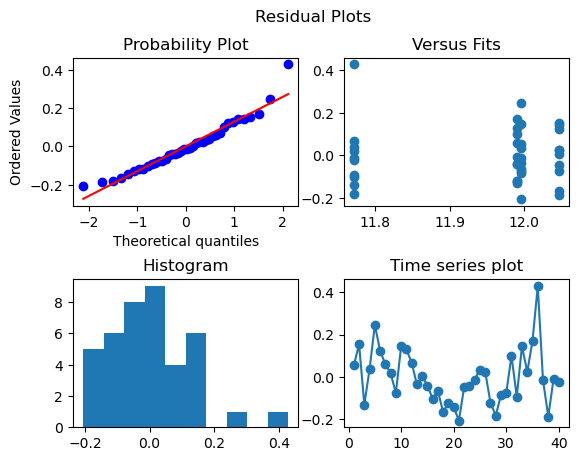

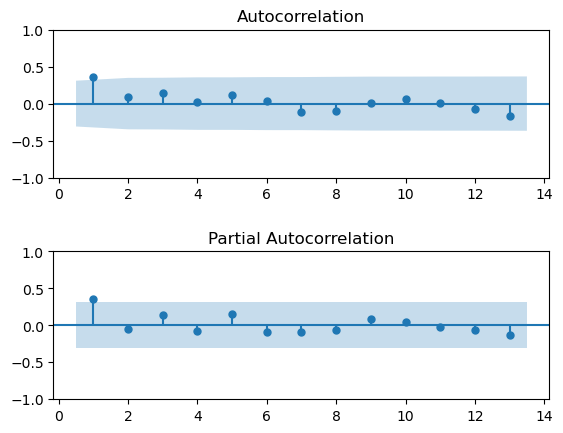

Runs test statistic = -2.201
Runs test p-value = 0.028
Reject H0: the data are not random


In [10]:
mf.shapirplusresplots(model)
mf.acfpacf(model.resid)
mf.runs(model.resid)


In [11]:
mf.bartlett_test(model.resid,1)
#sembra esserci un po' di autocorrelazione nei residui al lag1!
#includiamo anche lag1 e rifacciamo tutto!

Test statistic rk = 0.360858
Rejection region starts at 0.309898
The null hypothesis is rejected


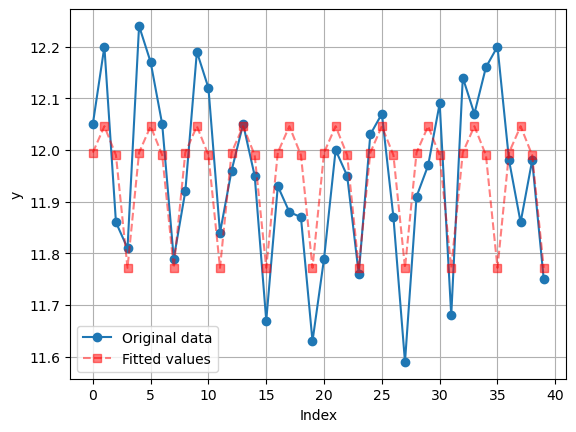

In [12]:
mf.plotyvsfits(y,model)

In [13]:
data['lag1']=data['X'].shift(1)

In [14]:
x = data[['lag1','step1', 'step2', 'step3', 'step4']].iloc[1:,:]
import statsmodels.api as sm
import qda
x = sm.add_constant(x) 
y = data['X'].iloc[1:]
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
X =  + 6.104 const + 0.361 lag1 + 1.630 step1 + 1.607 step2 + 1.533 step3 + 1.335 step4

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 6.1043   1.5252   4.0024 3.2158e-04
 lag1 0.3614   0.1595   2.2655 2.9966e-02
step1 1.6297   0.3550   4.5909 5.7887e-05
step2 1.6071   0.3898   4.1224 2.2770e-04
step3 1.5327   0.3979   3.8514 4.9468e-04
step4 1.3349   0.3891   3.4312 1.5951e-03

MODEL SUMMARY
-------------
     S  R-sq  R-sq(adj)
0.1302 0.483     0.4222

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  4.0  0.5230  0.1307   7.9413 1.2403e-04
     const  1.0  0.2637  0.2637  16.0194 3.2158e-04
      lag1  1.0  0.0845  0.0845   5.1325 2.9966e-02
     step1  1.0  0.3470  0.3470  21.0764 5.7887e-05
     step2  1.0  0.2798  0.2798  16.9940 2.2770e-04
     step3  1.0  0.2442  0.2442  14.8334 4.9468e-04
     step4  1.0  0.1938  0.1938  11.7729 1.5951e-03
     Error 34.

Shapiro-Wilk test p-value on the residuals = 0.110


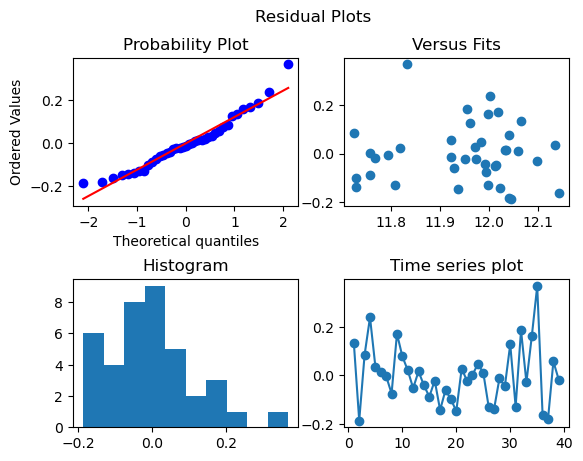

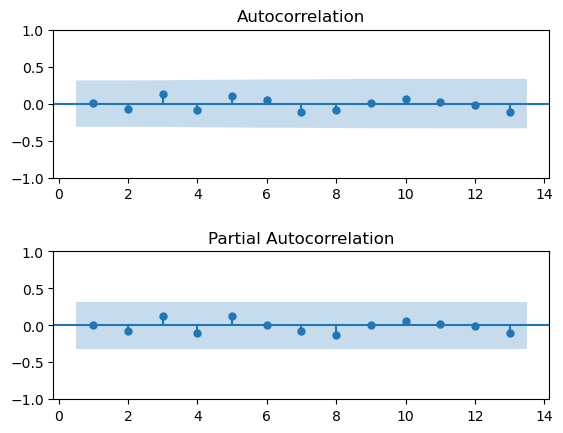

Runs test statistic = -0.126
Runs test p-value = 0.900
Accept H0: the data are random


In [15]:
mf.shapirplusresplots(model)
mf.acfpacf(model.resid)
mf.runs(model.resid)


The head of the quality department is interested in using spindle power data to monitor the stability of 
the process. Based on the result at point a) design a suitable control chart with 𝐴𝑅𝐿0 = 200. Assume the 
existence of assignable cause if out of control observations are present.

In [16]:
ARL=200
alpha=1/200
k_alpha=stats.norm.ppf(1-alpha/2)

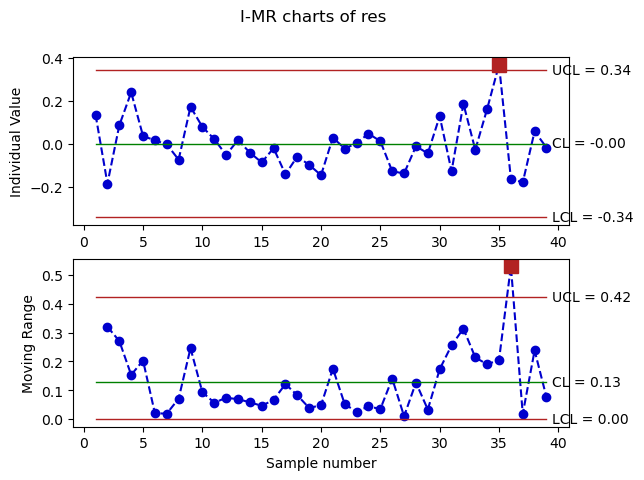

In [17]:
df_SCC = pd.DataFrame({'res': model.resid}) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')
#osservazione negli individuals dei residui [34] è OOC.
#sapendo che c'è un'osservazione in meno rispetto alla time series originale allora
#l'indice nelle osservazioni originali sarà [35] ossia la 36-esima osservazione del 
#dataframe originale

In [18]:
np.linspace(0,39,40)
data['observation']=np.linspace(0,39,40)

In [19]:
#dummy approach per togliere l'OOC:
OOC_indx=mf.extractOOCindx(df_SCC,'I_TEST1')
OOC_indx_corrected=OOC_indx+1 #basato su quanto detto
data['observation']=np.linspace(0,39,40)
data['dummy_OOC'] = np.where((data['observation'] == int(OOC_indx_corrected)), 1, 0)

The index of the OOC point is: [34]


In [20]:
data['dummy_OOC'] = np.where((data['observation'] == int(OOC_indx_corrected)), 1, 0)

In [21]:
x = data[['lag1','step1', 'step2', 'step3', 'step4','dummy_OOC']].iloc[1:,:]
import statsmodels.api as sm
import qda
x = sm.add_constant(x) 
y = data['X'].iloc[1:]
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
X =  + 7.172 const + 0.249 lag1 + 1.887 step1 + 1.890 step2 + 1.821 step3 + 1.574 step4 + 0.429 dummy_OOC

COEFFICIENTS
------------
     Term   Coef  SE Coef  T-Value    P-Value
    const 7.1722   1.3463   5.3272 7.0234e-06
     lag1 0.2488   0.1409   1.7661 8.6622e-02
    step1 1.8874   0.3139   6.0122 9.3064e-07
    step2 1.8897   0.3447   5.4815 4.4524e-06
    step3 1.8210   0.3519   5.1749 1.1015e-05
    step4 1.5741   0.3415   4.6092 5.8066e-05
dummy_OOC 0.4286   0.1194   3.5880 1.0650e-03

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.1122 0.6281     0.5717

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  5.0  0.6801  0.1360  11.1465 2.4045e-06
     const  1.0  0.3463  0.3463  28.3795 7.0234e-06
      lag1  1.0  0.0381  0.0381   3.1193 8.6622e-02
     step1  1.0  0.4411  0.4411  36.1468 9.3064e-07
     step2  1.0  0.3667  0.3667  30.0470 4.4524e-06
     step3  1.0  0.3268 

Shapiro-Wilk test p-value on the residuals = 0.792


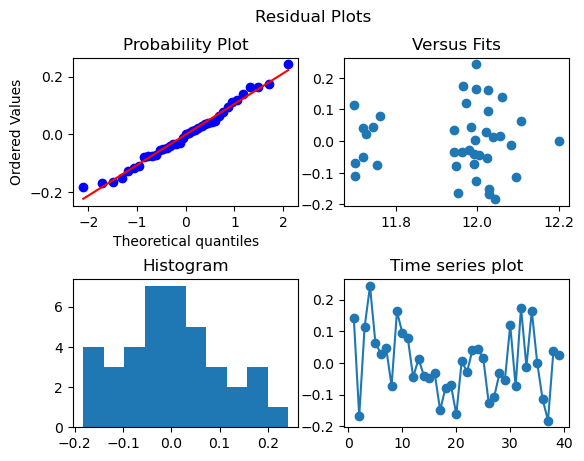

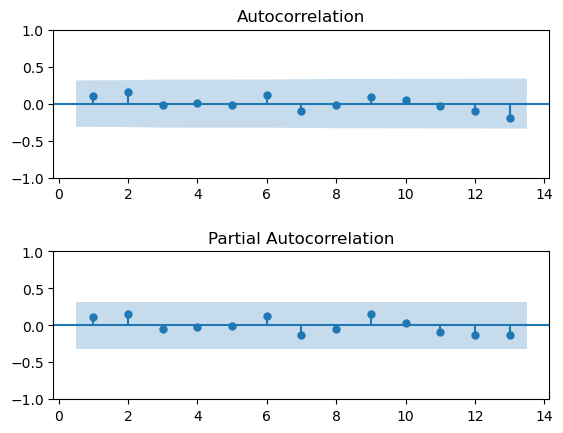

Runs test statistic = -0.483
Runs test p-value = 0.629
Accept H0: the data are random


In [22]:
mf.shapirplusresplots(model)
mf.acfpacf(model.resid)
mf.runs(model.resid)


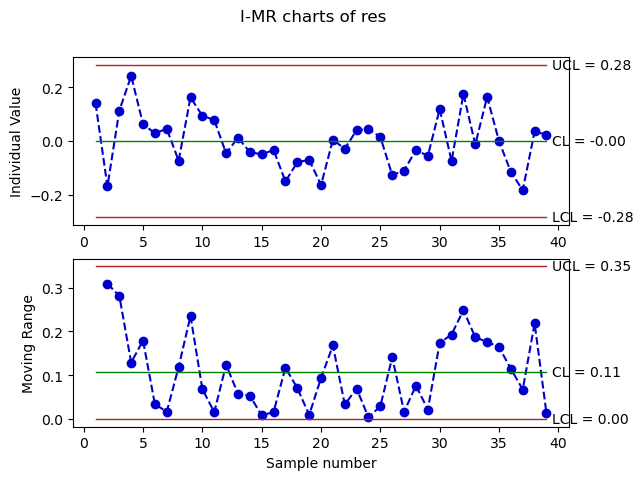

In [23]:
df_SCC = pd.DataFrame({'res': model.resid}) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')

By using a suitable statistical test, determine whether the power consumption of the finishing operation 
is statistically lower than the power consumption during the roughing phase (exclude out of control 
observations identified in point b), if any).

In [29]:
data1 = data[(data['Step'] == 4) & (data['dummy_OOC'] == 0)][['X']] #step4
data2 = data[(data['Step'] != 4) & (data['dummy_OOC'] == 0)][['X']] #other steps
n1=len(data1)
n2=len(data2)

In [30]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level
F0 = data1.var()/data2.var() 
df1 = n1 - 1 # degrees of freedom for supplier 
df2 = n2 - 1 # degrees of freedom for supplier 2
#attenzione ai df che sono invertiti nell'IDC!!!!!!!
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.2f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

p_value_F0 = 2 * stats.f.cdf(F0, df1, df2)
print('p-value for F-test for equal variances: %.3f' % p_value_F0)

#accettiamo che le varianze siano uguali

Confidence interval on the ratio of variances (CL = 0.95): [0.198, 2.057]
p-value for F-test for equal variances: 0.348


In [33]:
t0, p_value_t0 = stats.ttest_ind(data1, data2, equal_var=True, alternative='less')
print('t-test: t0 = %.3f' % t0)
print('p-value for t-test: %.3f' % p_value_t0)

#rifiutiamo ipotesi nulla e quindi assumiamo che effettivamente si consumi di meno alla fine

t-test: t0 = -6.722
p-value for t-test: 0.000


In [35]:
n1+n2-2
#dof della t di student

37